<a href="https://colab.research.google.com/github/Ailton3112/glp/blob/main/Experimento_02_Predicao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pandas.core.common import SettingWithCopyWarning
import warnings

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
df = pd.read_csv('/content/Piauí.csv')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275097 entries, 0 to 275096
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sale_id           275097 non-null  int64  
 1   client_id         275097 non-null  int64  
 2   date              275097 non-null  object 
 3   name_product      275097 non-null  object 
 4   quantity_product  275097 non-null  int64  
 5   value_product     275097 non-null  float64
 6   total             275097 non-null  float64
 7   payments          275097 non-null  object 
 8   city              275097 non-null  object 
 9   state_federation  275097 non-null  object 
 10  InvoiceDay        275097 non-null  object 
 11  PrevInvoiceDate   275097 non-null  object 
 12  DayDiff           275097 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 27.3+ MB
None


In [ ]:
for p in df['payments'].unique():
  print(p)

Dinheiro
Carteira
Dinheiro, Carteira
Cartão Credishop
Cartão Visa
Cheque
Cartão Master
Cartão Hiper
Cartão Elo
Dinheiro, Cartão Visa
PIX
Crédito de Cliente
Dinheiro, Crédito de Cliente
Boleto Bancário
Cartão de Crédito
Dinheiro, Cartão de Crédito
Cartão de Débito
Carteira, Crédito de Cliente
Dinheiro, Cartão de Débito
Dinheiro, Boleto Bancário
Dinheiro, Cartão Hiper
Carteira, Cartão Visa
Carteira, Cartão Master
Dinheiro, Cartão Elo
Dinheiro, Cartão Master
Cartão Outro
Cartão Visa, Cartão Master
Vale Gás
Carteira, Cartão de Débito
Carteira, Cartão de Crédito
Transferência Bancária
Dinheiro, Vale Gás
Cartão de Crédito, Cartão de Débito
Dinheiro, Cartão Credishop
Dinheiro, PIX


In [ ]:
df['payments'].nunique()

35

In [ ]:
payment_terms = {
    'Débito': 'Débito',
    'Pix': 'Pix',
    'Dinheiro': 'Dinheiro',
    'Crédito': 'Crédito',
    'Cartão': 'Crédito',
    'Cheque': 'Cheque',
    'Vale': 'Vale',
    'Carteira': 'Carteira',
    'Transferência': 'Transferência Bancária'
}
for key, value in payment_terms.items():
  df.loc[df['payments'].str.contains(
      key, case=False
  ), 'payments'] = value

In [ ]:
df['payments'].unique()

array(['Dinheiro', 'Carteira', 'Crédito', 'Cheque', 'Pix',
       'Boleto Bancário', 'Débito', 'Vale', 'Transferência Bancária'],
      dtype=object)

In [ ]:
df['payments'] = df['payments'].astype('category')

In [ ]:
product_terms = {
    r'^.*GLP\s?13\s?KG.*$': r'GLP 13 KG'
}

for key, value in product_terms.items():
  df['name_product'] = (
      df['name_product'].str.replace(key, value)
  )

In [ ]:
df['name_product'].unique()

array(['GLP 13 KG'], dtype=object)

In [ ]:
df = pd.get_dummies(
       df, prefix='d', columns=['city']
 )

In [ ]:
df.head()

,sale_id,client_id,date,name_product,quantity_product,value_product,total,payments,state_federation,InvoiceDay,...,d_Santana do Piauí,d_Santo Antônio dos Milagres,d_Sussuapara,d_São Gonçalo do Piauí,d_São João da Canabrava,d_São Luís do Piauí,d_São Miguel do Tapuio,d_São Pedro do Piauí,d_Teresina,d_Valença do Piauí
0,155595,29293,2013-05-18 23:12:27,GLP 13 KG,1,40.0,40.0,Dinheiro,Piauí,2013-05-18,...,0,0,0,0,0,0,0,0,1,0
1,157615,29293,2013-06-25 22:21:47,GLP 13 KG,1,45.0,45.0,Dinheiro,Piauí,2013-06-25,...,0,0,0,0,0,0,0,0,1,0
2,160001,29293,2013-08-11 21:51:12,GLP 13 KG,1,45.0,45.0,Dinheiro,Piauí,2013-08-11,...,0,0,0,0,0,0,0,0,1,0
3,163353,29293,2013-10-17 22:57:38,GLP 13 KG,1,45.0,45.0,Dinheiro,Piauí,2013-10-17,...,0,0,0,0,0,0,0,0,1,0
4,161757,29293,2013-12-03 20:31:04,GLP 13 KG,1,40.0,40.0,Dinheiro,Piauí,2013-12-03,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X = df.drop(['client_id', 'sale_id','DayDiff', 'name_product','date','InvoiceDay', 'PrevInvoiceDate','payments','state_federation'], axis=1)
Y = df['DayDiff']

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=4
)
print("Tamanho do set train:",len(x_train))
print("Tamanho do set test:",len(x_test))

Tamanho do set train: 192567
Tamanho do set test: 82530


In [ ]:
scaler = MinMaxScaler()
columns = [
     'quantity_product', 'value_product', 'total',
 ]

x_train[columns] = scaler.fit_transform(x_train[columns])
x_test[columns] = scaler.transform(x_test[columns])

In [ ]:
x_train.head()


,quantity_product,value_product,total,d_Altos,d_Amarante,d_Angical do Piauí,d_Aroazes,d_Aroeiras do Itaim,d_Bocaina,d_Campo Maior,...,d_Santana do Piauí,d_Santo Antônio dos Milagres,d_Sussuapara,d_São Gonçalo do Piauí,d_São João da Canabrava,d_São Luís do Piauí,d_São Miguel do Tapuio,d_São Pedro do Piauí,d_Teresina,d_Valença do Piauí
224196,0.0,0.047619,0.047619,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148203,0.0,0.031008,0.031008,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41395,0.0,0.025471,0.025471,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
114721,0.0,0.039867,0.039867,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3104,0.0,0.019934,0.019934,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
x_train.shape

(192567, 42)

In [ ]:
 yscaler = MinMaxScaler()
 y_train = yscaler.fit_transform(y_train.values.reshape(-1, 1))
 y_test = yscaler.transform(y_test.values.reshape(-1, 1))
 y_train

array([[0.34408602],
       [0.44086022],
       [0.17204301],
       ...,
       [0.31182796],
       [0.40860215],
       [0.44086022]])

# Modelo Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import sklearn


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
r = LinearRegression()
r = r.fit(x_train, y_train)

In [ ]:
y_predicted = r.predict(x_test)
#y_predicted_train = r.predict(x_train)

In [ ]:
scores = cross_val_score(r, x_train, y_train, scoring='r2', cv=5)
scores   

array([ 2.06913942e-02, -8.59443067e+19,  1.71349244e-02,  2.06307127e-02,
        2.09807136e-02])

In [ ]:
score = r.score(x_test, y_test)
score

-7.132784251062753e+19

In [ ]:
from matplotlib import pyplot

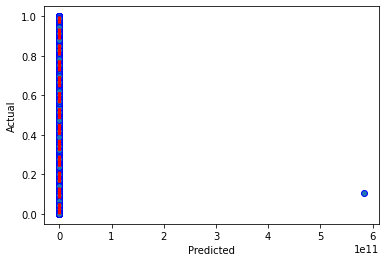

In [ ]:
fig, ax = pyplot.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
pyplot.show()

In [ ]:
# Modelo de Árvore de Regressão Linear


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_predicted_d = dtr.predict(x_test)

In [ ]:
from matplotlib import pyplot

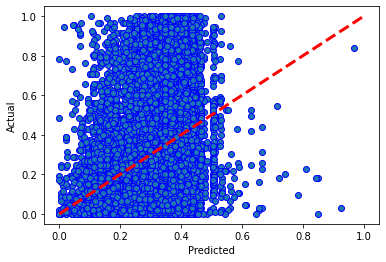

In [ ]:
fig, ax = pyplot.subplots()
ax.scatter(y_predicted_d, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
pyplot.show()

# Modelo de Rede Neural

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
nnr = MLPRegressor(hidden_layer_sizes=(100, 50))
nnr.fit(x_train, y_train.ravel())


MLPRegressor(hidden_layer_sizes=(100, 50))

In [ ]:
y_predicted = nnr.predict(x_test)

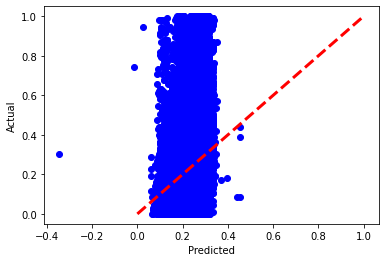

In [ ]:
fig, ax = pyplot.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1),color="blue", label="original")
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3, color="red", label="predicted")
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
pyplot.show()

# Modelo XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor


In [ ]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

[13:12:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
score = xgb.score(x_train, y_train)  
score

0.03620783044457587

In [ ]:
scores = cross_val_score(xgb, x_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())


[12:47:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

# Exemplo Prático

## Regressão Linear

In [ ]:
 df['date'] = pd.to_datetime(df['date'])
 df.set_axis(df['date'], inplace=True)

In [ ]:
import numpy

def transform_record(client_id, dataframe, scaler, model, normalizer):
  ds = dataframe[dataframe['client_id'] == client_id]
  ds = ds.iloc[-1:]
  X = ds.drop(['client_id','sale_id', 'DayDiff', 'date', 'name_product','InvoiceDay', 'state_federation', 'PrevInvoiceDate','payments'], axis=1)
  date = ds['date']
  columns = [
    'quantity_product', 'value_product','total',
  ]
  X[columns] = scaler.transform(X[columns])
  y_predicted = model.predict(X.values)
  y = normalizer.inverse_transform(y_predicted.reshape(-1, 1))
  new_date = date.values[0] + (y[0] * numpy.timedelta64(1, 'D'))
  return new_date[0], date.values[0]

In [ ]:
new_date, old_date = transform_record(
    29293, dataframe=df, scaler=scaler, model=r, normalizer=yscaler
)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
import datetime

In [ ]:
n_date = datetime.datetime.fromtimestamp(
    new_date.item() / 10**9
).strftime('%Y.%m.%d')

o_date = datetime.datetime.fromtimestamp(
    old_date.item() / 10**9
).strftime('%Y.%m.%d')

In [ ]:
print(f'Última compra em: {o_date}. Próxima data de compra estimada em: {n_date}')

Última compra em: 2022.01.04. Próxima data de compra estimada em: 2022.02.21
